<a href="https://colab.research.google.com/github/ecemboluk/Machine-Learning-and-Deep-Learning-Worksheets/blob/master/Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks

Üretici Çekişmeli Ağlar olarak Türkçe'ye çevirebileceğimiz GANs'lar sentetik veri üretiminde en çok kullanılan derin öğrenme algoritmaları arasında yer almaktadır. 

### Peki Neden Sentetik Veri Üretme İhtiyacı Hissediyoruz?

Veri toplama ve hazırlama süreci oldukça uzun ve zorlu bir süreçtir. Bu süreci kolaylaştırmak amacıyla genelde veri arttırma yöntemlerine başvurulur. Özellikle derin öğrenme yöntemleri ne kadar çok veri ile beslenirse, o kadar çok öğrenim başarısı artmaktadır. 

Yapay zeka çalışmaları arasında ilk sıralarda yer alan sentetik veri üretimi bugün çok başarılı veriler üretebiliyor. Veri üretmek resim veri setlerinin yanı sıra, görsel ve işitsel veri setlerini de başarılı bir şekilde üretebiliyor. Gelin hep birlikte bu GANs algoritmasının derinliklerine inelim.

## GANs Nasıl Çalışır?

GANs, eğitim veri seti içerisinden bulunan verilerle aynı istatistik özelliklere sahip verileri üretmeyi öğrenen bir derin öğrenme algoritmasıdır. Ian Goodfellow ile derin öğrenme dünyasını sarsan GAN yaklaşımı istatistiksel anlamda gerçeğinden ayırt edilemeyen sentetik verilerin üretilmesinin önünü açıyor. Çalışma yapısında başlangıçta kötü bir taklitçi gibi düşünülebilir. Taklit yeteneği giderek gelişir ve gerçeğinden ayırt edilemeyen fakat aynısı olmayan yeni çıktılar üretilmektedir.

Aşağıda GANs algortimasının çalışmasını daha iyi bir şekilde inceleyebilirsiniz.


<img src="https://miro.medium.com/max/1800/1*TKr1dtcNgJCA8uYY1OhmSg.png"/>

GANs algoritmaları iki farklı ağdan oluşur: Generator (Üretici) ve Discriminator(Ayırt Edici) 

**Generator (Üretici) Ağlar**, aldığı rastgele gürültü (random noise) ile veri üretimini sağlayan ağdır. Ürettiği veriyi ayırt edici ağa gönderir ve onun kararı sonucu aldığı loss (yitim) fonksiyonu ile öğrenme işlemini tamamlayarak daha iyi veriler üretir.

**Discriminator (Ayırt Edici) Ağlar**, eğitim veri seti ile üretilen verileri alarak karşılaştırır ve hangi verinin gerçek hangi veririnin sahte olduğuna karar verir. 

Şimdi MNIST veri seti ile bu konuyu biraz pekiştirelim. 

 




## Kütüphane Kurulumu

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist

## Veri Setinin Yüklenmesi ve Hazırlanması

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32)-127.5) / 127.5

print("X Train shape", x_train.shape)
print("X Test shape", x_test.shape)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
#x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print("X Train shape", x_train.shape)
#print("X Test shape", x_test.shape)

X Train shape (60000, 28, 28)
X Test shape (10000, 28, 28)
X Train shape (60000, 784)


## Verinin Görselleştirilmesi

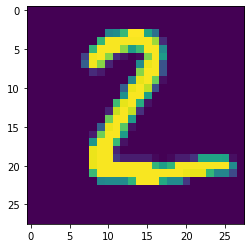

In [47]:
plt.imshow(x_test[1])

## Generator (Üretici) Ağın Oluşturulması 

In [48]:
def generator():

  generator = Sequential()
  generator.add(Dense(units = 512, input_dim = 100))
  generator.add(ReLU())

  generator.add(Dense(units = 512))
  generator.add(ReLU())

  generator.add(Dense(units = 1024))
  generator.add(ReLU())

  generator.add(Dense(units = 784, activation = "tanh"))

  generator.compile(loss = "binary_crossentropy", 
                    optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
  
  return generator

In [49]:
generator = generator()
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               51712     
_________________________________________________________________
re_lu_9 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
re_lu_10 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              525312    
_________________________________________________________________
re_lu_11 (ReLU)              (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)              

## Discriminator (Ayırt Edici) Ağ Oluşturulması

In [50]:
def discriminator():

  discriminator =  Sequential()
  discriminator.add(Dense(units = 1024, input_dim = 784))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  discriminator.add(Dense(units = 512))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  discriminator.add(Dense(units = 256))
  discriminator.add(ReLU())

  discriminator.add(Dense(units = 1, activation = "sigmoid"))
  discriminator.compile(loss = "binary_crossentropy", 
                        optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
  
  return discriminator

In [51]:
discriminator = discriminator()
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
re_lu_12 (ReLU)              (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
re_lu_13 (ReLU)              (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)              

## GANs Modelinin Oluşturulması

In [52]:
def gans(generator,discriminator):
  discriminator.trainable = False
  gan_input = Input(shape = (100,))
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs = gan_input, outputs = gan_output)
  gan.compile(loss = "binary_crossentropy", optimizer = "adam")
  return gan

In [53]:
gans = gans(generator,discriminator)
gans.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 784)               1643280   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 1460225   
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


## GANs Modelinin Eğitilmesi

In [56]:
epoch = 50
batch_size = 256

for e in range(epoch):
  for _ in range(batch_size):
    noise = np.random.normal(0,1,[batch_size,100])
   
    generated_image = generator.predict(noise)
    image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]
   
    x = np.concatenate([image_batch,generated_image])
   
    y_dis = np.zeros(batch_size*2)
    y_dis[:batch_size] = 1

    discriminator.trainable = True
    discriminator.train_on_batch(x,y_dis)

    noise = np.random.normal(0,1,[batch_size,100])
    y_gen = np.ones(batch_size)

    discriminator.trainable = False

    gans.train_on_batch(noise,y_gen)

  print("epoch: ",e)

#gans.save_weights("gans_model.h5")

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49


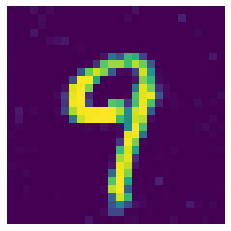

In [57]:
noise = np.random.normal(loc = 0, scale = 1, size = [100,100])
generated_images = generator.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[1], interpolation = "nearest")
plt.axis('off')
plt.show()